In [2]:
import h5py
import os
import numpy as np
import scipy.io

# file_path = '/data0/zhiyong/data/CMR_data/single_coil/crnn_acc_10/recon_100.mat'
# file_path = '/data0/jingcheng/SOTA_Methods_Results_Cardiac_Cine_mc/single-coil/crnn_acc_10/recon_100.mat'
file_path = '/data0/zhiyong/data/CMR_data/single_coil/crnn_acc_8/recon_100.mat'

# 检查文件是否存在
if not os.path.exists(file_path):
    print("错误：文件不存在！")
else:
    print("文件存在，大小:", os.path.getsize(file_path), "字节")

# 尝试用 h5py 读取（HDF5 格式）
try:
    with h5py.File(file_path, 'r') as f:
        print("HDF5 文件中的对象:", list(f.keys()))
except Exception as e:
    print("h5py 读取失败:", e)
    # 尝试用 scipy.io.loadmat 读取（旧版 MATLAB 格式）
    try:
        data = scipy.io.loadmat(file_path)
        print("scipy.io.loadmat 读取成功，变量名:", data.keys())
    except Exception as e:
        print("scipy.io.loadmat 读取失败:", e)
        print("可能原因：文件损坏或格式不兼容。")
# data = scipy.io.loadmat(file_path)
# print("变量名:",data.keys())

# try:
#     with h5py.File(file_path, 'r') as f:
#         print("文件中的对象:", list(f.keys()))
#         for key in f.keys():
#             data = f[key][()]
#             print(f"\n变量名: {key}")
#             print("数据类型:", type(data))
#             print("数据形状:", data.shape if hasattr(data, 'shape') else "非数组")
# except Exception as e:
#     print("错误:", e)

文件存在，大小: 5308624 字节
h5py 读取失败: Unable to open file (file signature not found)
scipy.io.loadmat 读取成功，变量名: dict_keys(['__header__', '__version__', '__globals__', 'recon'])


In [7]:
import numpy as np
# 对图像进行归一化并调整亮度
def normalize_and_adjust_brightness(image, brightness_factor=3):
    img_max = np.max(np.abs(image))
    img_norm = np.abs(image) / img_max
    img_brightened = np.clip(img_norm * brightness_factor, 0, 1)
    return img_brightened



文件存在，大小: 5308624 字节
h5py 读取失败: Unable to open file (file signature not found)
scipy.io.loadmat 读取成功，变量名: dict_keys(['__header__', '__version__', '__globals__', 'recon'])

变量名: recon
数据类型: <class 'numpy.ndarray'>
数据形状: (192, 192, 18)
不支持的三维数据格式，无法显示。


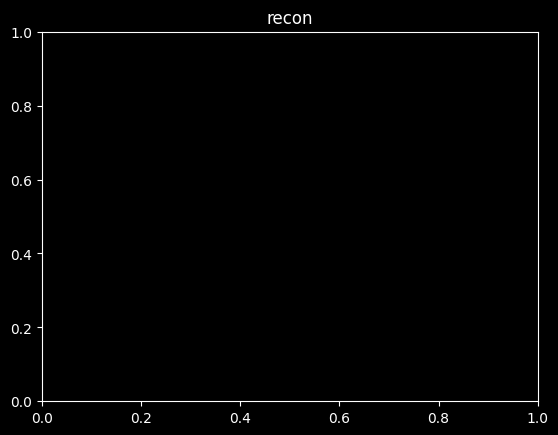

In [3]:
import h5py
import os
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# 文件路径
file_path = '/data0/zhiyong/data/CMR_data/single_coil/crnn_acc_8/recon_100.mat'

# 检查文件是否存在
if not os.path.exists(file_path):
    print("错误：文件不存在！")
else:
    print("文件存在，大小:", os.path.getsize(file_path), "字节")

# 尝试用 h5py 读取（HDF5 格式）
try:
    with h5py.File(file_path, 'r') as f:
        print("HDF5 文件中的对象:", list(f.keys()))
        for key in f.keys():
            data = f[key][()]
            print(f"\n变量名: {key}")
            print("数据类型:", type(data))
            print("数据形状:", data.shape if hasattr(data, 'shape') else "非数组")

            # 显示图片
            if len(data.shape) == 2:  # 二维数据（单通道图像）
                plt.imshow(data, cmap='gray')
            elif len(data.shape) == 3:  # 三维数据（多通道图像）
                if data.shape[2] == 3:  # RGB 图像
                    plt.imshow(data)
                else:
                    print("不支持的三维数据格式，无法显示。")
            else:
                print("不支持的数据维度，无法显示。")

            plt.title(key)
            plt.show()

except Exception as e:
    print("h5py 读取失败:", e)
    # 尝试用 scipy.io.loadmat 读取（旧版 MATLAB 格式）
    try:
        data = scipy.io.loadmat(file_path)
        print("scipy.io.loadmat 读取成功，变量名:", data.keys())
        for key in data.keys():
            if key.startswith('__'):  # 跳过 MATLAB 自带的元数据
                continue
            value = data[key]
            print(f"\n变量名: {key}")
            print("数据类型:", type(value))
            print("数据形状:", value.shape if hasattr(value, 'shape') else "非数组")

            # 显示图片
            if len(value.shape) == 2:  # 二维数据（单通道图像）
                plt.imshow(value, cmap='gray')
            elif len(value.shape) == 3:  # 三维数据（多通道图像）
                if value.shape[2] == 3:  # RGB 图像
                    plt.imshow(value)
                else:
                    print("不支持的三维数据格式，无法显示。")
            else:
                print("不支持的数据维度，无法显示。")

            plt.title(key)
            plt.show()

    except Exception as e:
        print("scipy.io.loadmat 读取失败:", e)
        print("可能原因：文件损坏或格式不兼容。")

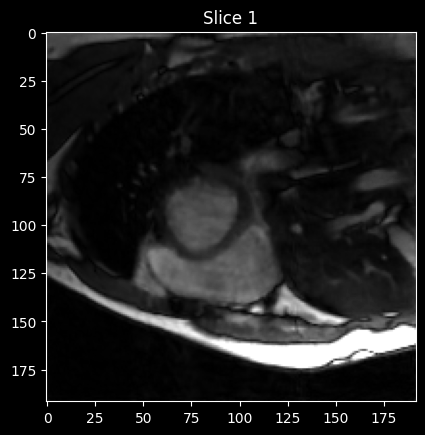

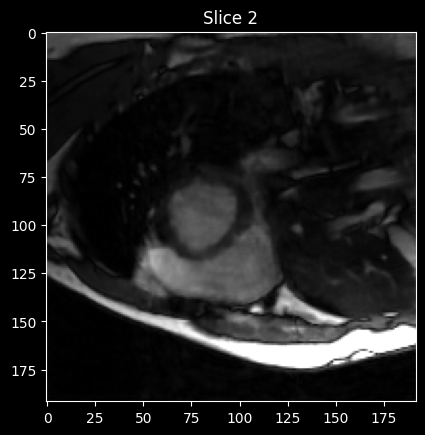

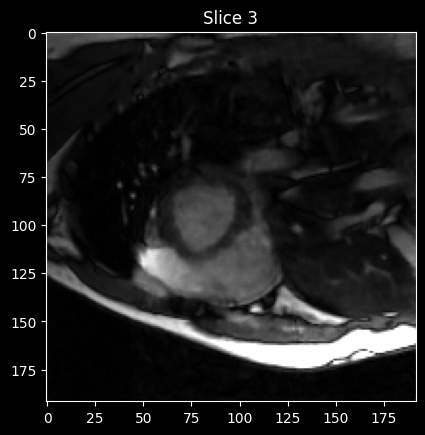

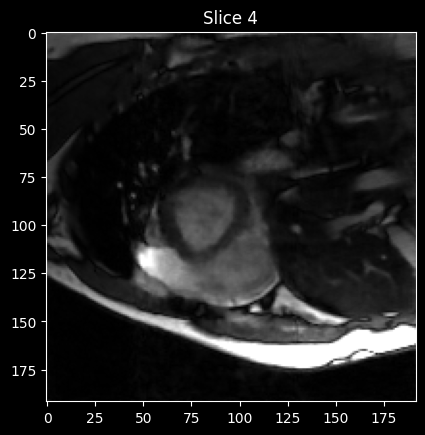

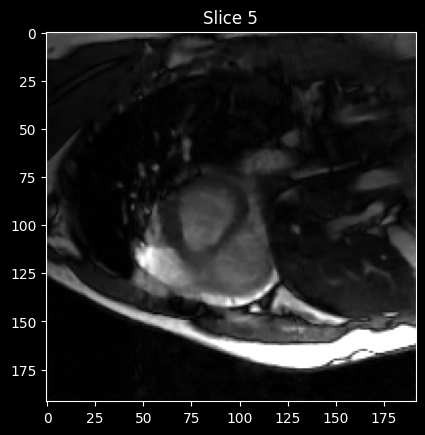

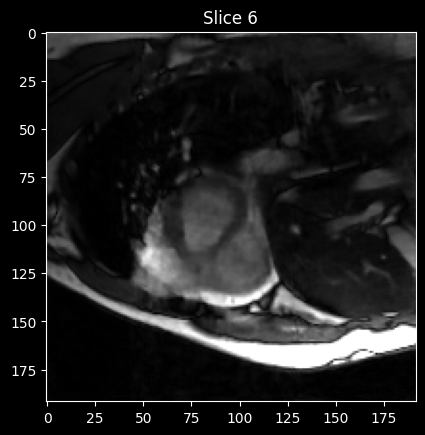

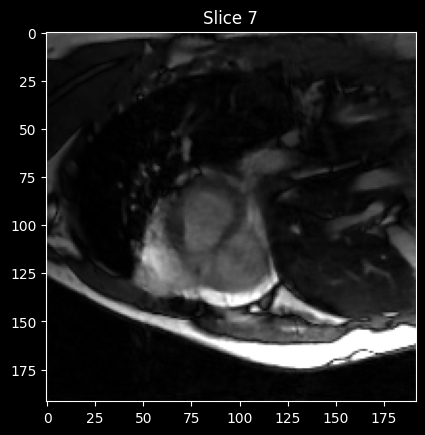

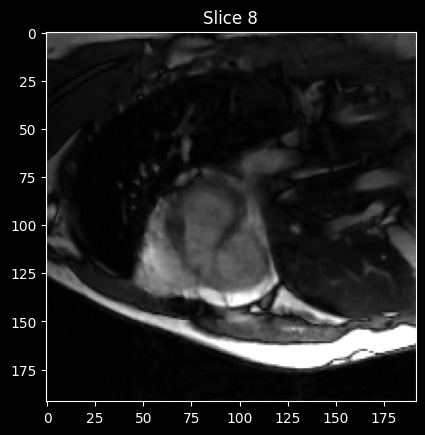

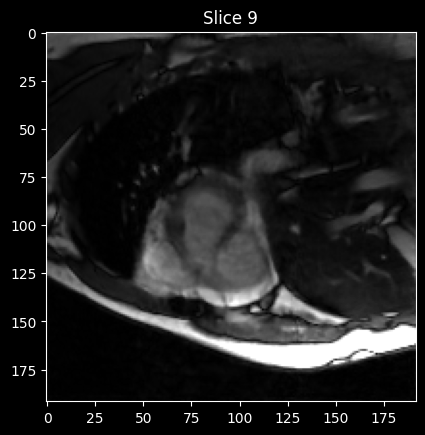

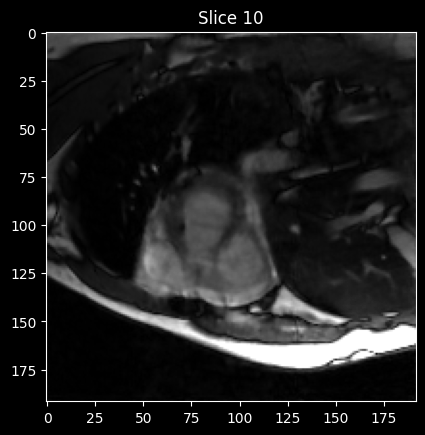

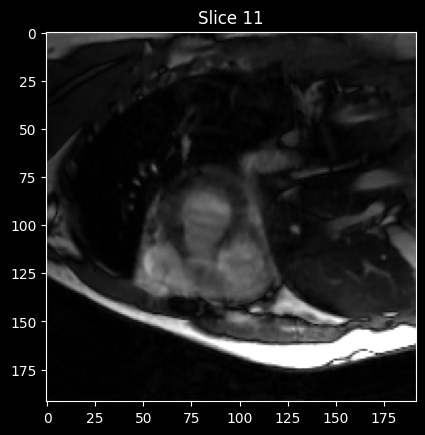

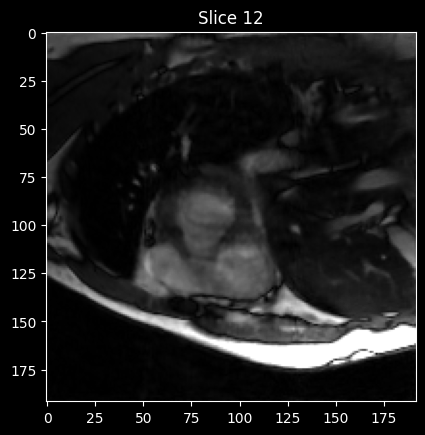

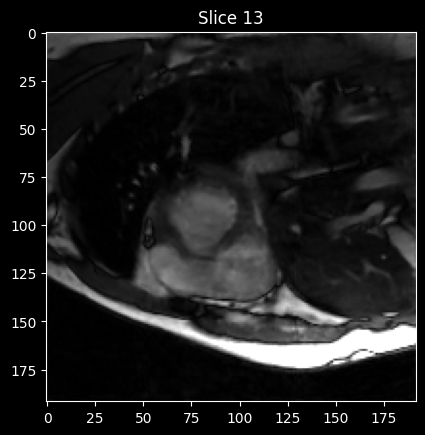

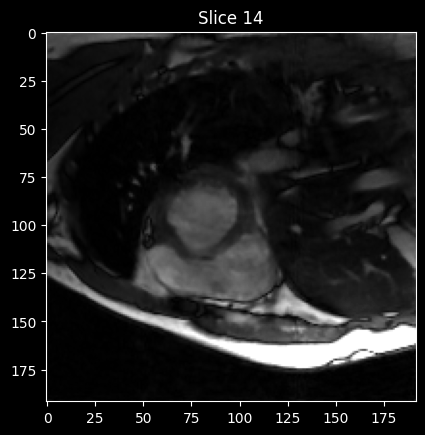

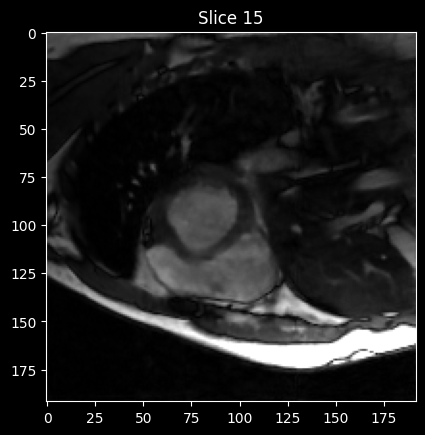

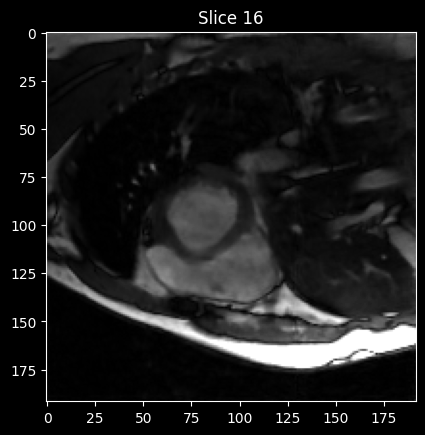

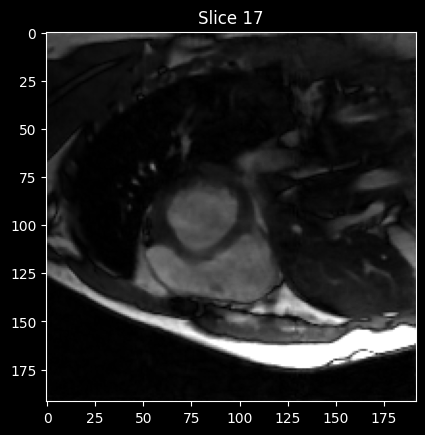

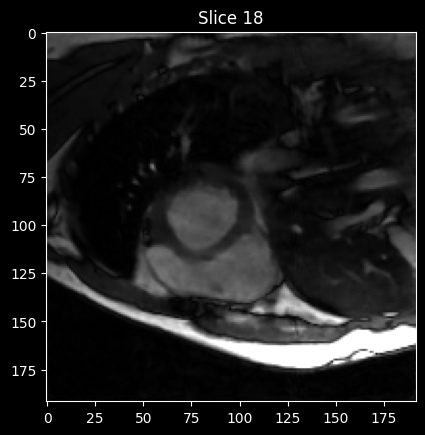

In [8]:
import scipy.io
import matplotlib.pyplot as plt

# 文件路径
file_path = '/data0/zhiyong/data/CMR_data/single_coil/crnn_acc_8/recon_100.mat'

# 读取文件
data = scipy.io.loadmat(file_path)
recon = data['recon']

# 遍历每个切片并显示
for i in range(recon.shape[2]):
    slice_data = recon[:, :, i]
    slice_np = np.abs(slice_data)
    normalize_slice_np = normalize_and_adjust_brightness(slice_np)
    # plt.imshow(np.abs(slice_data), cmap='gray')
    plt.imshow(np.abs(normalize_slice_np), cmap='gray')
    plt.title(f'Slice {i+1}')
    plt.show()

/tmp/ipykernel_2192071/987958427.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  combined_image[row * recon.shape[0]:(row + 1) * recon.shape[0],


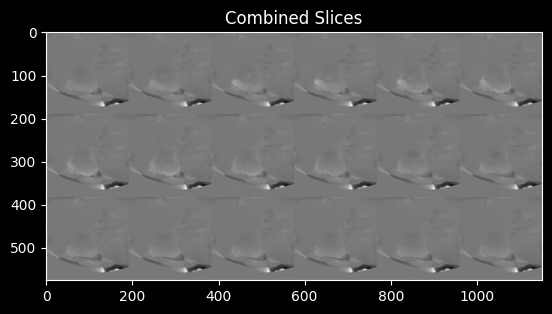

In [6]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# 文件路径
file_path = '/data0/zhiyong/data/CMR_data/single_coil/crnn_acc_8/recon_100.mat'

# 读取文件
data = scipy.io.loadmat(file_path)
recon = data['recon']

# 计算每行显示的切片数量
num_cols = 6
num_rows = int(np.ceil(recon.shape[2] / num_cols))

# 创建一个空白的大图像
combined_image = np.zeros((recon.shape[0] * num_rows, recon.shape[1] * num_cols))

# 填充每个切片到空白图像中
for i in range(recon.shape[2]):
    row = i // num_cols
    col = i % num_cols
    combined_image[row * recon.shape[0]:(row + 1) * recon.shape[0],
                   col * recon.shape[1]:(col + 1) * recon.shape[1]] = recon[:, :, i]

# 显示拼接后的图像
plt.imshow(combined_image, cmap='gray')
plt.title('Combined Slices')
plt.show()

In [1]:
import mat73
file_path = '/data0/jingcheng/SOTA_Methods_Results_Cardiac_Cine_mc/single-coil/crnn_acc_10/recon_100.mat'
data = mat73.loadmat(file_path)

TypeError: /data0/jingcheng/SOTA_Methods_Results_Cardiac_Cine_mc/single-coil/crnn_acc_10/recon_100.mat is not a MATLAB 7.3 file. Load with scipy.io.loadmat() instead.